# Heart Failure Prediction using Support Vector Machine Classifier Algorithm

Citation:

fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved 11th October, 2024 from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

## Problem Definition

**Objective**: 
This project aims to develop a machine learning model using a Support Vector Machine (SVM) classifier to predict heart failure in patients based on clinical and demographic data from the Kaggle dataset. By analyzing features such as age, cholesterol, and blood pressure, the model will help identify individuals at high risk for heart failure. The project will evaluate the model's performance using metrics like accuracy, precision, recall, F1-score, and ROC-AUC, and will optimize it through hyperparameter tuning and cross-validation to improve predictive accuracy and generalizability.

**Target Variable**: The target variable or outcome is the `HeartDisease`.

#### Importing Required Libraries

In [26]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  

## Dataset Creation

In [27]:
df = pd.read_csv('heart.csv')
df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


Attribute Information:

* **Age**: age of the patient [years]
* **Sex**: sex of the patient [M: Male, F: Female]
* **ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* **RestingBP**: resting blood pressure [mm Hg]
* **Cholesterol**: serum cholesterol [mm/dl]
* **FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* **RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* **MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]
* **ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]
* **Oldpeak**: oldpeak = ST [Numeric value measured in depression]
* **ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* **HeartDisease**: output class [1: heart disease, 0: Normal]


Make a copy of the dataframe

In [28]:
df_copy = df.copy()

#### Initial Data Preprocessing

* Looking at the Data Structure: info(), describe(), value_counts()
* Handling missing values
* Removing duplicates
* Converting categorical data into numerical form 
* Basic feature selection (removing irrelevant columns)

In [29]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [30]:
df_copy.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Let's check unique value counts for all categorical columns.

In [31]:
for column in df_copy.select_dtypes(include=['object', 'category']).columns:
    print(f"Value counts for '{column}':")
    print(df_copy[column].value_counts())
    print("\n" + "="*50 + "\n")

Value counts for 'Sex':
Sex
M    725
F    193
Name: count, dtype: int64


Value counts for 'ChestPainType':
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


Value counts for 'RestingECG':
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64


Value counts for 'ExerciseAngina':
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64


Value counts for 'ST_Slope':
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64




Check for duplicate rows across all columns

In [32]:
df_copy[df_copy.duplicated()].any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

#### Exploratory Data Analysis (EDA)

* Visualize the data using histograms, scatter plots, box-plots etc.
* Identify`patterns, relationships, or outliers` in the data.
* Understand the `distribution of features, correlations, redundancy and multicollinearity` etc.
* Check for class imbalace.
* Feature engineering might be done based on insights from EDA (e.g., creating new features or transforming existing ones).

Let's visualize box-plots for outliers.

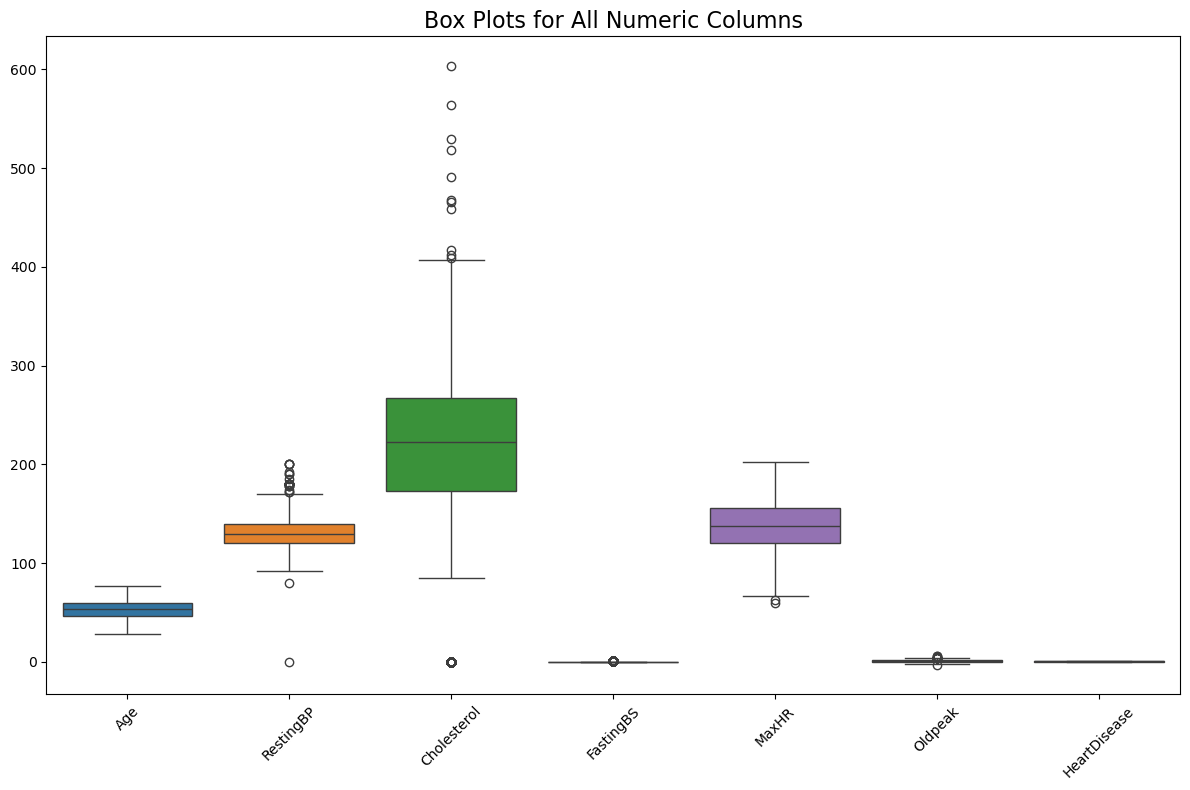

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

sns.boxplot(data=df_copy.select_dtypes(include=['number']))

plt.title('Box Plots for All Numeric Columns', fontsize=16)
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()


Visualizing the distribution of all numeric features

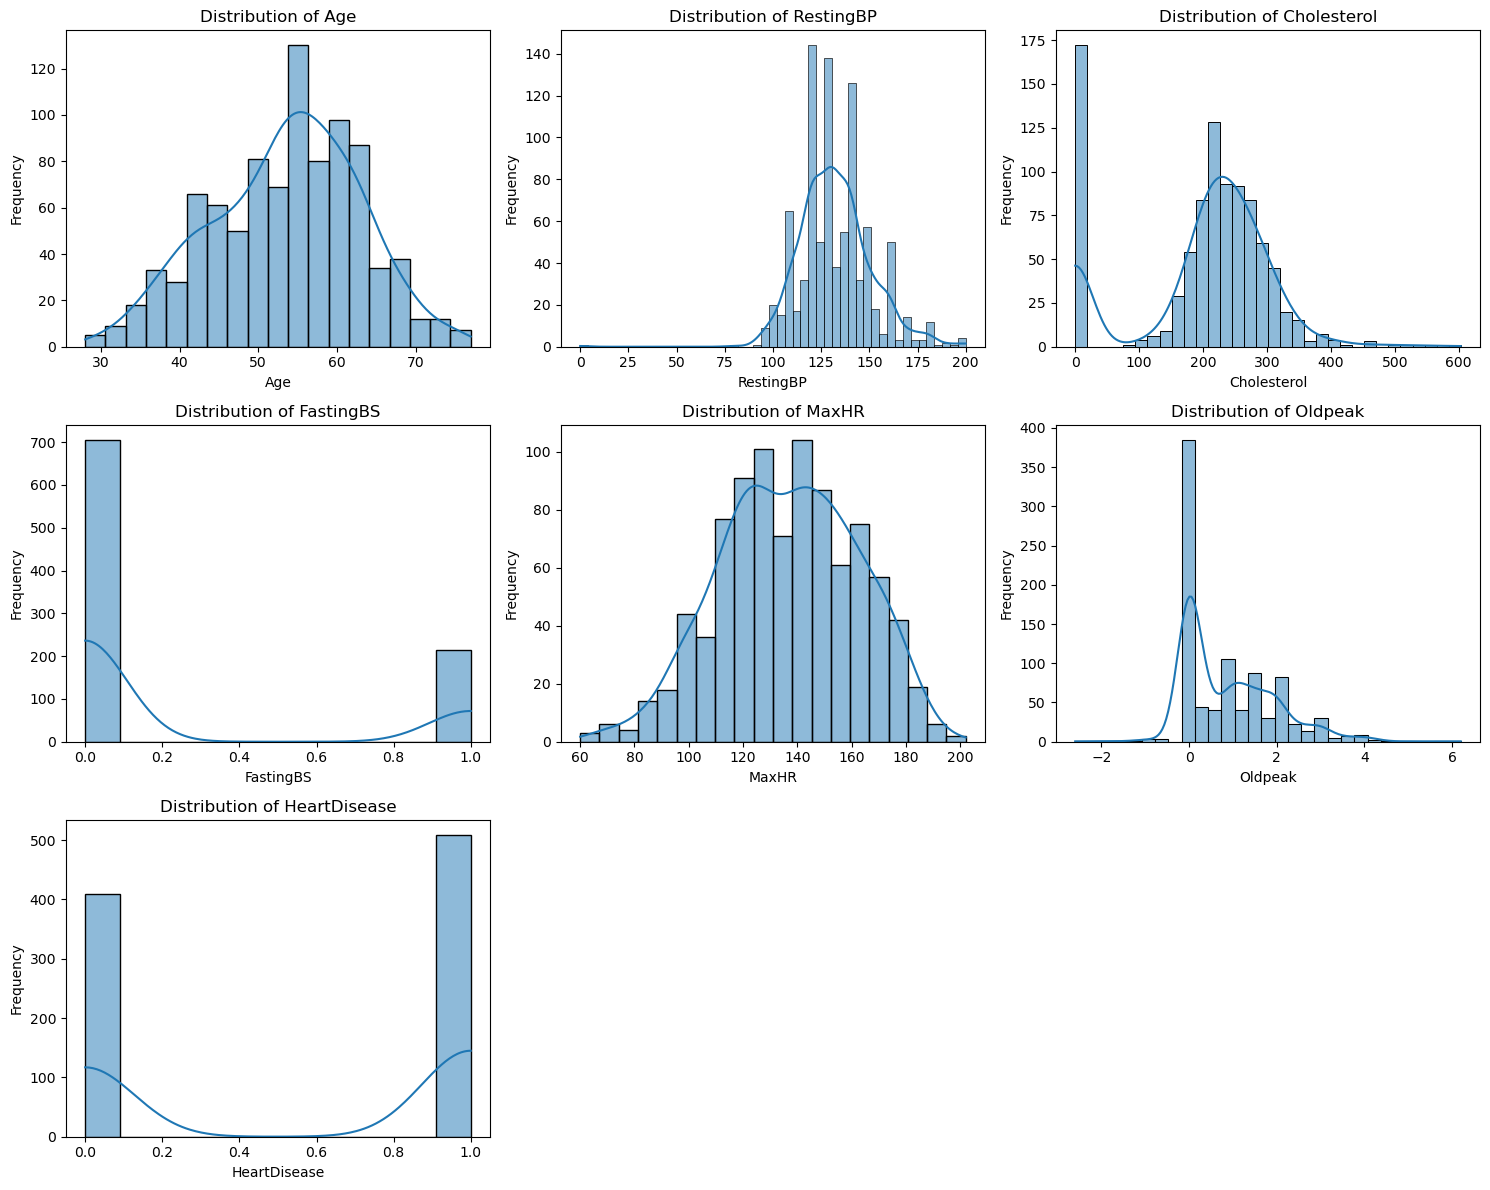

In [34]:

numeric_columns = df_copy.select_dtypes(include=['number']).columns

n_cols = 3 
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  

plt.figure(figsize=(15, n_rows * 4))

for i, column in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df_copy[column], kde=True)  
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Looking out for correlations, redundancy and multicollinearity

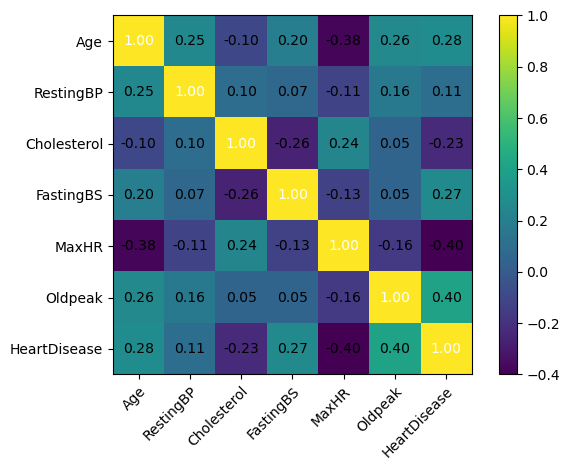

In [35]:
import numpy as np
from mlxtend.plotting import heatmap

df_num = df_copy.select_dtypes(include='number')
cm = np.corrcoef(df_num.values.T)
hm = heatmap(cm, row_names=df_num.columns, column_names=df_num.columns)

plt.tight_layout()
plt.show()

Checking for class imbalance

In [36]:
df_copy['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

#### Further Preprocessing

* Dealing with `outliers` found during EDA.
* Feature engineering
* Scaling/normalizing and creating pipeline.

We can see from our histogram that the Cholesterol column has lots of data points around zero, something that seems impossible medically for Cholesterol level to be zero. Let's use python to find out.

In [37]:
cholesterol_below_1 = df_copy[df_copy['Cholesterol'] < 1]

# cholesterol_below_1.shape[0]

value_counts = cholesterol_below_1['Cholesterol'].value_counts()

print("Value counts of Cholesterol values less than 1:")
print(value_counts)

Value counts of Cholesterol values less than 1:
Cholesterol
0    172
Name: count, dtype: int64


We need to replace the 172 zero Cholesterol values less than 1 with random samples from non-zero values using `Random Sample Imputation` and then check the distribution after imputation.

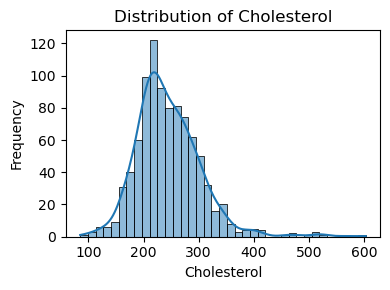

In [38]:
plt.figure(figsize=(4, 3))

non_zero_cholesterol = df_copy[df_copy['Cholesterol'] > 0]['Cholesterol']

df_copy.loc[df_copy['Cholesterol'] < 1, 'Cholesterol'] = np.random.choice(non_zero_cholesterol, size=(df_copy['Cholesterol'] < 1).sum())

sns.histplot(df_copy['Cholesterol'], kde=True)

plt.title(f'Distribution of Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Create Transformation Pipelines for both numeric and categorical input features. 

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# Create a pipeline for numerical attributes
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
    ])

# Create a pipeline for categorical attributes
cat_pipeline = Pipeline([   
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse_output=False)),
    ])

num_input_attribs = df_copy.select_dtypes(include=['int64', 'float64'])
num_attribs = num_input_attribs.drop('HeartDisease', axis=1).columns
cat_attribs = df_copy.select_dtypes(include=['object', 'category']).columns

# Combine the numerical and categorical pipelines using ColumnTransformer
preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

#### Train-Test Split

* Splitting the dataset into training and test sets.
* Training set: 70-80% of the dataset
* Testing set: 20-30% of the dataset.

In [40]:
from sklearn.model_selection import train_test_split

X, y = df_copy.drop('HeartDisease', axis=1), df_copy['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42,
                                                    stratify=y)   # You need stratify=y for classification

In [41]:
X_train_std = preprocess_pipeline.fit_transform(X_train)
X_train_std

array([[ 0.85606442, -0.6726184 , -1.12582493, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.33134286,  0.43546734,  1.35530771, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.33134286,  0.98951022,  0.14040828, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.61315593,  1.54355309,  1.40664149, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.64617579,  0.98951022,  0.19174206, ...,  0.        ,
         1.        ,  0.        ],
       [-0.92798886,  0.43546734, -0.39004077, ...,  0.        ,
         0.        ,  1.        ]])

Dataframe view of our transformed `X_train_std` above.

In [42]:
def get_feature_names(data):
    df_prepared = pd.DataFrame(
        data,
        columns=preprocess_pipeline.get_feature_names_out(),
        index=X_train.index)
    return df_prepared

df_prepared = get_feature_names(X_train_std)
df_prepared.head(5)

,num__Age,num__RestingBP,num__Cholesterol,num__FastingBS,num__MaxHR,num__Oldpeak,cat__Sex_F,cat__Sex_M,cat__ChestPainType_ASY,cat__ChestPainType_ATA,cat__ChestPainType_NAP,cat__ChestPainType_TA,cat__RestingECG_LVH,cat__RestingECG_Normal,cat__RestingECG_ST,cat__ExerciseAngina_N,cat__ExerciseAngina_Y,cat__ST_Slope_Down,cat__ST_Slope_Flat,cat__ST_Slope_Up
335,0.856064,-0.672618,-1.125825,1.868023,-0.082372,-1.563271,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
368,0.331343,0.435467,1.355308,-0.535325,-0.629164,1.037503,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
111,0.331343,0.989510,0.140408,-0.535325,-1.722749,1.966351,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
336,1.905508,1.543553,0.243076,-0.535325,-0.863504,0.665964,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
479,0.226399,2.097596,1.714644,-0.535325,-0.511994,1.501927,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [43]:
y_train

335    1
368    1
111    1
336    0
479    1
      ..
405    1
438    1
93     1
722    1
62     0
Name: HeartDisease, Length: 642, dtype: int64

## Model Selection 

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

pipeline = Pipeline(steps=[
    ('preprocessor', preprocess_pipeline),   
    ('classifier', SVC())  
])

## Model Training

* Train a basic model without tuning any hyperparameters to establish a `baseline performance`.
* Fit the model to the entire training set

In [45]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object'))])),
                ('classifier', SVC())])

## Model Assesment

* Evaluate on both training and test set.
* Cross-validation to evaluate model performance.
* Compare `training accuracy` and `test accuracy` to detect `overfitting or underfitting`.
* Compare `test accuracy` and `cross-validation scores` to provide `better measures of generalization`.
* Evaluate Initial Model: Generate and examine the `classification report`.
* Plot and visualize `learning curves`.

Since our data is fairly balanced, we will just use accuracy score for evaluation.

In [46]:
y_train_pred = pipeline.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {training_accuracy}')

cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

y_test_pred = pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

if training_accuracy > cv_scores.mean() and training_accuracy > test_accuracy:
    print("Overfitting Detected: The model performs much better on training data than on validation or test data.")
elif test_accuracy > cv_scores.mean():
    print("Underfitting Detected: The model performs better on test data than on validation.")
else:
    print("Model is Generalizing Well: Consistent performance on training, validation, and test data.")

Training Accuracy: 0.8847352024922118
Cross-Validation Scores: [0.84496124 0.86046512 0.8828125  0.890625   0.78125   ]
Mean Cross-Validation Score: 0.8520227713178293
Test Accuracy: 0.8913043478260869
Underfitting Detected: The model performs better on test data than on validation.


Let's generate the classification report for initial model evaluation.

In [47]:
y_pred_initial = pipeline.predict(X_test)

print("Initial Model Classification Report:")
print(classification_report(y_test, y_pred_initial))

Initial Model Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       123
           1       0.89      0.92      0.90       153

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



## Model Optimization

* Use `GridSearchCV` or `RandomSearchCV` to find the optimal combination of hyperparameters.
* Evaluate final Model: Generate and examine the `classification report`.
* After hyperparameter tuning, use `confusion matrix` to assess the model’s performance to ensure that it generalizes well to new, unseen data.


In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__C': [0.1, 1, 10, 100],  
    'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  
    'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001]  
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best parameters found by GridSearch:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_svm_model = grid_search.best_estimator_
best_svm_model.fit(X_train, y_train)

y_pred_best = best_svm_model.predict(X_test)
print("Accuracy after tuning:", accuracy_score(y_test, y_pred_best))
print("Classification Report after tuning:\n", classification_report(y_test, y_pred_best))

Best parameters found by GridSearch: {'classifier__C': 1, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}
Best cross-validation score: 0.8489423076923078
Accuracy after tuning: 0.8913043478260869
Classification Report after tuning:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88       123
           1       0.89      0.92      0.90       153

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



After hyperparameter tuning, it’s important to assess the model’s performance to ensure that it generalizes well to new, unseen data.

In [49]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_best)

print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[106  17]
 [ 13 140]]
